# Carregar as bibliotecas

In [80]:
import numpy as np
from skimage import io, data, filters, util, color, transform, exposure
from scipy import ndimage, stats, fft
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_uint, img_as_ubyte

# Questão 1

<p align="justify">
Dada a seguinte imagem, eliminar o ruído produzido pelo ruído periódico. Teste com os seguinte filtros: média, mediana e a filtragem no domínio da frequência. Para o caso da filtragem no domínio da frequência, primeiro calcule o espectro de Fourier (Figura b) e elimine a \textbf{região} ao redor dos ``spikes'' (assinalados com a seta vermelha). Os ``spikes'' estão localizados nas coordenadas (88,88) e (170,170). A terceira imagem mostra o processo depois de apagar esses valores.
Para apagar os valores, basta atribuir zero para todos os elementos da região.
</p>

<p align="justify">

</p>

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1ExhUVoHaj2i4gN1UWC6U7RfP-boZhnRL" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1BGJbV6sXNNlt2PmIZ7RCyHpQfPRpZgJ6" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1d3bAvzHJ5wRwPxIXGZXiUhP7bA5o0SbY" alt="Drawing"  width="300"/> </td>
</tr></table>




In [81]:
def filtragem(img, window_size=5, coord1=(88,88), coord2=(170,170)):
  fimg_shifted=fft.fftshift(fft.fft2(img))
  for i in range(coord1[0]-window_size,coord1[1]+window_size):
    for j in range(coord1[0]-window_size,coord1[1]+window_size):
      fimg_shifted[i,j]=0
  for i in range(coord2[0]-window_size,coord2[1]+window_size):
      for j in range(coord2[0]-window_size,coord2[1]+window_size):
        fimg_shifted[i,j]=0
  nimg=np.log(np.abs((fft.ifft2(fimg_shifted)+1)))

  # nimg é a imagem filtrada e fimg_shifted são os coeficientes de Fourier com os spikes apagados
  return nimg, fimg_shifted



In [82]:
lenna = io.imread('https://drive.google.com/uc?id=1ExhUVoHaj2i4gN1UWC6U7RfP-boZhnRL', as_gray=True)


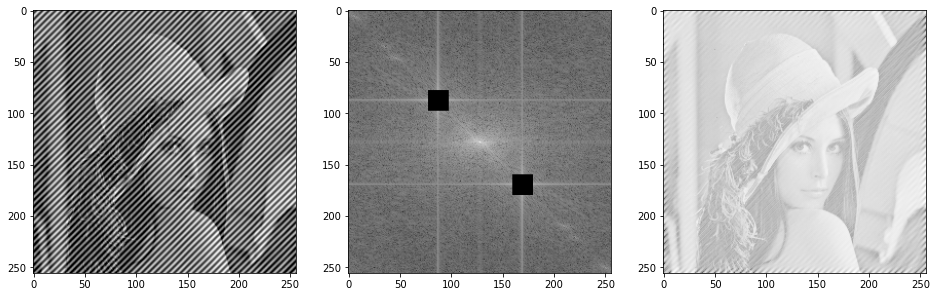

In [83]:
nimg, fimg = filtragem(lenna, window_size=10)

f, ax = plt.subplots(1, 3, figsize=(16,16))
ax[0].imshow(lenna, cmap='gray')
ax[1].imshow(np.log(np.abs(fimg)+1), cmap='gray')
ax[2].imshow(nimg, cmap='gray')


# Questão 2
<p align="justify">
Calcular a transformada de Fourier das seguientes imagens. Logo, compare sua semelhança usado a similaridade de cossenos.
<p>

<p>A similaridade de cossenos é definida da seguinte forma:
$$\frac{\sum{A*B}}{\sqrt{\sum{A^2}} \sqrt{\sum{B^2}}}$$ 
onde $A$ e $B$ são vetores.




<ol>
  <li>Implemente a função que calcule a similaridade de cossenos.</li>
  <li>Rotacione a imagem <i>A </i> em 30 e 60 graus. Logo, calcular a transformada de Fourier da letra A e das versões rotacionadas.  Depois, determine a semelhança entre elas.</li>
  <li>Compare a semelhança dos coeficientes de Fourier das letras <i>A, B</i>, e <i>V</i></li>
  <li>Compare a semelhança dos coeficientes de Fourier das letras <i>B</i>, e a versão de <i>B</i> trasladada</li>
  <li><i>Transforme as imagens de coordenadas cartesianas para coordenadas polares. Depois calcule a transformada de Fourier e determine a semelhança entre elas.</li>
</ol>
</p>



<table><tr>
<td> <img src="https://drive.google.com/uc?id=1h4QeEvRgB7wbAY9MocKGaaKDdniiQWQ6" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1WV7pcoGXW6cJh74OjBwiD41gGcXfRMft" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1soqJU7p5e59FBYBi1f5g34_4en8Q1e0k" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1V5hZKGaQ-wlCjVnYgOG6WnnPih5nF7ET" alt="Drawing"  width="300"/> </td>
</tr></table>


### 2.1 Cálculo da similaridade de cossenos 



In [84]:
from numpy.linalg import norm

In [85]:
def cossine_sim(vecA, vecB):
  #result=(sum(sum(vecA*vecB))/(sum(sum(vecA*vecA))*sum(sum(vecB*vecB))))
  result=(sum(sum(np.dot(vecA,vecB)))/(sum(sum(np.dot(vecA,vecA)))*sum(sum(np.dot(vecB,vecB)))))
  return result

In [86]:
print( cossine_sim(np.array([[2,4],[1,6]]), np.array([[3,5],[20,6]])) )

0.0068665377176015474


### 2.2 Rotacionar *A* em 30 e 60 graus. Depois calcule a Transformade Fourier das 3 imágenes. Finalmente, compare a letra A com a letra A rotacionada em 30 graus e com a letra A rotacionaod em 60 graus.

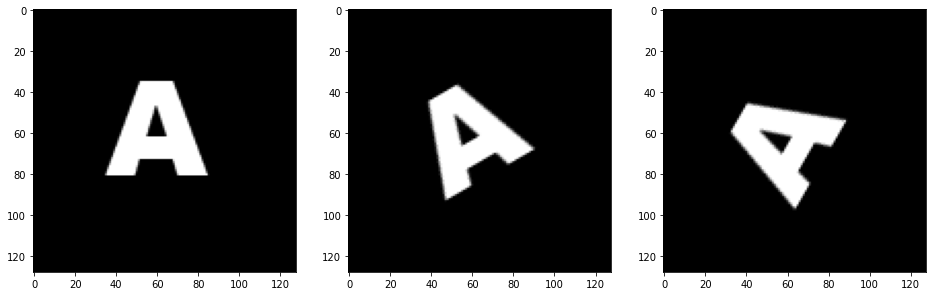

In [87]:
A = io.imread('https://drive.google.com/uc?id=1h4QeEvRgB7wbAY9MocKGaaKDdniiQWQ6', as_gray = True)
A_30 = transform.rotate(A,30)
A_60 = transform.rotate(A,60)
f,ax = plt.subplots(1,3,figsize=(16,16))
ax[0].imshow(A, cmap='gray')
ax[1].imshow(A_30, cmap='gray')
ax[2].imshow(A_60, cmap='gray')


#### Trasformada de Fourier das 3 imagens

In [88]:
fA = fft.fft2(A)
fA_30 = fft.fft2(A_30)
fA_60 = fft.fft2(A_60)

print(f'Distancia entre A e A30: {cossine_sim(np.abs(fA), np.abs(fA_30))}')
print(f'Distancia entre A e A60: {cossine_sim(np.abs(fA), np.abs(fA_60))}')

Distancia entre A e A30: 1.1560901977843554e-11
Distancia entre A e A60: 1.0543844813906113e-11


###  2.3 Calcule a Transformade Fourier das letras *A, B* e *V*. Depois, compare os coeficientes de Fourier da letra A com a letra B, e com a letra V.

In [89]:
B = io.imread('https://drive.google.com/uc?id=1WV7pcoGXW6cJh74OjBwiD41gGcXfRMft', as_gray = True)
V = io.imread('https://drive.google.com/uc?id=1V5hZKGaQ-wlCjVnYgOG6WnnPih5nF7ET', as_gray = True)

#### Transformade Fourier das letras B e V

In [90]:
fB = fft.fft2(B)
fV = fft.fft2(V)

In [91]:
print(f'Distancia entre A e B: {cossine_sim(np.abs(fA), np.abs(fB))}')
print(f'Distancia entre A e V: {cossine_sim(np.abs(fA), np.abs(fV))}')

Distancia entre A e B: 3.0364190765865546e-14
Distancia entre A e V: 4.229708221726417e-14


### 2.4 Calcule a transformada de Fourier da letra *Bt* traslada e compare os coeficientes de Fourier das letras *B* e *Bt*

In [92]:
Bt = io.imread('https://drive.google.com/uc?id=1soqJU7p5e59FBYBi1f5g34_4en8Q1e0k', as_gray = True)
fBt = fft.fft2(Bt)

In [93]:
print(f'Distancia entre B e Bt: {cossine_sim(np.abs(fB), np.abs(fBt))}')

Distancia entre B e Bt: 2.67399832752823e-14


### 2.5 Transforme as 3 letras A de coordenadas cartesianas para coordenadas polares. Use a função <i>skimage.transform.warp_polar(image, center=None, radius=None, output_shape=None, scaling='linear', multichannel=False, channel_axis=None, **kwargs)</i>. Logo, calcule a transformada de Fourier da imagens transformadas e compare elas. Verifique se a distancian entre elas aumentou ou disminuiu

#### Transformando de coordenadas cartesianas para coordenadas polares. Usar a função <i>warp_polar</i>

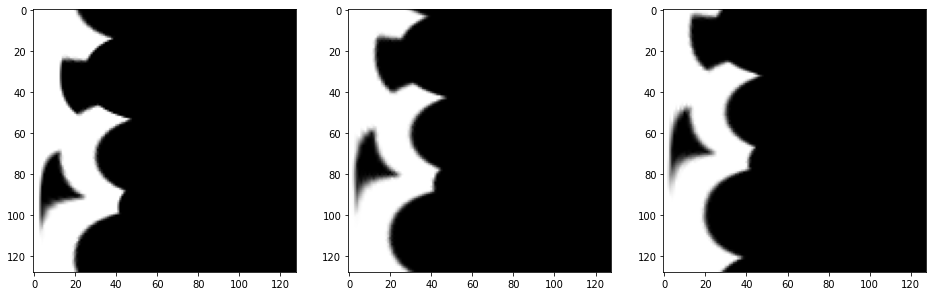

In [94]:
# imagens em coordanas polares
Ap = transform.warp_polar(A,output_shape=(A.shape))
A_30p = transform.warp_polar(A_30,output_shape=(A_30.shape))
A_60p = transform.warp_polar(A_60,output_shape=(A_60.shape))

f,ax = plt.subplots(1,3,figsize=(16,16))
ax[0].imshow(Ap, cmap='gray')
ax[1].imshow(A_30p, cmap='gray')
ax[2].imshow(A_60p, cmap='gray')


#### Calcular as transformadas de Fourier das imagens em coordenadas polares

In [95]:
fAp = fft.fft2(Ap)
fA_30p = fft.fft2(A_30p)
fA_60p = fft.fft2(A_60p)

print(f'Distancia entre A e A30: {cossine_sim(np.abs(fAp), np.abs(fA_30p))}')
print(f'Distancia entre A e A60: {cossine_sim(np.abs(fAp), np.abs(fA_60p))}')

Distancia entre A e A30: 1.6526897682712734e-09
Distancia entre A e A60: 1.6474334286560217e-09
